In [43]:
 import numpy as np
import matplotlib.pyplot as plt

'''
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]
'''

def plot_number_of_steps_single_model(total_steps, n_array, alpha_array, model_details): #model_path = False):
    plt.scatter([alpha_array],[total_steps], c = n_array, alpha = 0.2)
    plt.colorbar(label = "n")
    plt.yscale("log")
    plt.ylabel("# steps")
    plt.xlabel(r"$\alpha$")
    if model_details:
        title = r"type = {} + {}, inv_temp = {}, $\alpha$ = {}, $\beta$ = {}, $\gamma$ = {}, mlp_layers = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        plt.title("model: " + title)
    #if model_path:
    #    title = model_path.split("/")[-1]
    #    plt.title("model: " + title)
    plt.show()

def do_evaluation_for_single_model(saved_eval_path):
    model_path, model_details, n_array, alpha_array, energies_array_mean , total_steps = np.load(saved_eval_path, allow_pickle=True)
    plot_number_of_steps_single_model(total_steps, n_array, alpha_array, model_details) #model_path[0])
    
def do_evaluation_multiple_models(saved_eval_path_list):
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))
    def plot_number_of_steps(total_steps, alpha_array, model_details): #model_path = False):
        label = r"{} + {} with inv_temp = {}, loss_params = ({},{},{}), mlp_layers = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        ax[0].scatter([alpha_array],[total_steps], alpha = 0.2, label = label) #model_path.split("/")[-1])
    def plot_trajectory_mean(energies_array_mean, model_path):
        label = r"{} + {} with inv_temp = {}, loss_params = ({},{},{}), mlp_layers = {}".format(model_details[0][5], model_details[0][6],model_details[0][0], model_details[0][1], model_details[0][2], model_details[0][3], model_details[0][4])
        ax[1].plot(np.arange(1,len(energies_array_mean)+1,1), energies_array_mean, alpha = 0.2, label = label) #model_path.split("/")[-1])
        
    for saved_eval_path in saved_eval_path_list:
        model_path, model_details, n_array, alpha_array, energies_array_mean, total_steps = np.load(saved_eval_path, allow_pickle=True)
        plot_number_of_steps(total_steps, alpha_array, model_details) #model_path[0])
        plot_trajectory_mean(energies_array_mean, model_details) #model_path[0])
    
    ax[0].set_yscale("log")
    ax[0].set_ylabel("# steps")
    ax[0].set_xlabel(r"$\alpha$")
    ax[0].legend()

    ax[1].set_yscale("log")
    ax[1].set_xscale("log")
    ax[1].set_ylabel("# violated clauses / m")
    ax[1].set_xlabel("steps")
    ax[1].legend()
    plt.show()

def benchmark_two_models(saved_eval_path1, saved_eval_path2, color_coded = "n"):
    model_path1, model_details1, n_array1, alpha_array1, _ , total_steps1 = np.load(saved_eval_path1, allow_pickle=True)
    model_path2,model_details2, n_array2, alpha_array2, _ , total_steps2 = np.load(saved_eval_path2, allow_pickle=True)
    title1 = r"{} + {}, {}, ({},{},{}), {}".format(model_details1[0][5], model_details1[0][6],model_details1[0][0], model_details1[0][1], model_details1[0][2], model_details1[0][3], model_details1[0][4])
    title2 = r"{} + {}, {}, ({},{},{}), {}".format(model_details2[0][5], model_details2[0][6],model_details2[0][0], model_details2[0][1], model_details2[0][2], model_details2[0][3], model_details2[0][4])
    #title1 = r"type = {} + {}, inv_temp = {}, $\alpha$ = {}, $\beta$ = {}, $\gamma$ = {}, mlp_layers = {}".format(model_details1[0][5], model_details1[0][6],model_details1[0][0], model_details1[0][1], model_details1[0][2], model_details1[0][3], model_details1[0][4]) #model_path1[0].split("/")[-1]
    #title2 = r"type = {} + {}, inv_temp = {}, $\alpha$ = {}, $\beta$ = {}, $\gamma$ = {}, mlp_layers = {}".format(model_details2[0][5], model_details2[0][6],model_details2[0][0], model_details2[0][1], model_details2[0][2], model_details2[0][3], model_details2[0][4]) #model_path2[0].split("/")[-1]
    x = np.arange(np.min([np.min(total_steps1), np.min(total_steps2)]), np.max([np.max(total_steps1), np.max(total_steps2)]), 100)
    plt.plot(x, x, label = "f(x) = x")
    if color_coded == "n":
        plt.scatter(total_steps1,total_steps2, c = n_array1, alpha = 0.2)
        plt.colorbar(label = "n")
    if color_coded == "alpha":
        plt.scatter(total_steps1,total_steps2, c = alpha_array1, alpha = 0.2)
        plt.colorbar(label = r"$\alpha$")
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel("# steps of " + title2)
    plt.xlabel("# steps of " + title1)
    plt.legend()
    plt.title(title1 + " vs. " + title2)
    plt.show()
    

In [44]:
model_path, model_details,n_array, alpha_array, energies_array_mean, total_steps = np.load("/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_n300_subset/uniform_total_eval.npy", allow_pickle=True)
print(model_path)
# plot_number_of_steps(total_steps, n_array, alpha_array)


['uniform']


# Evaluation on an unseen dataset with same size of problems

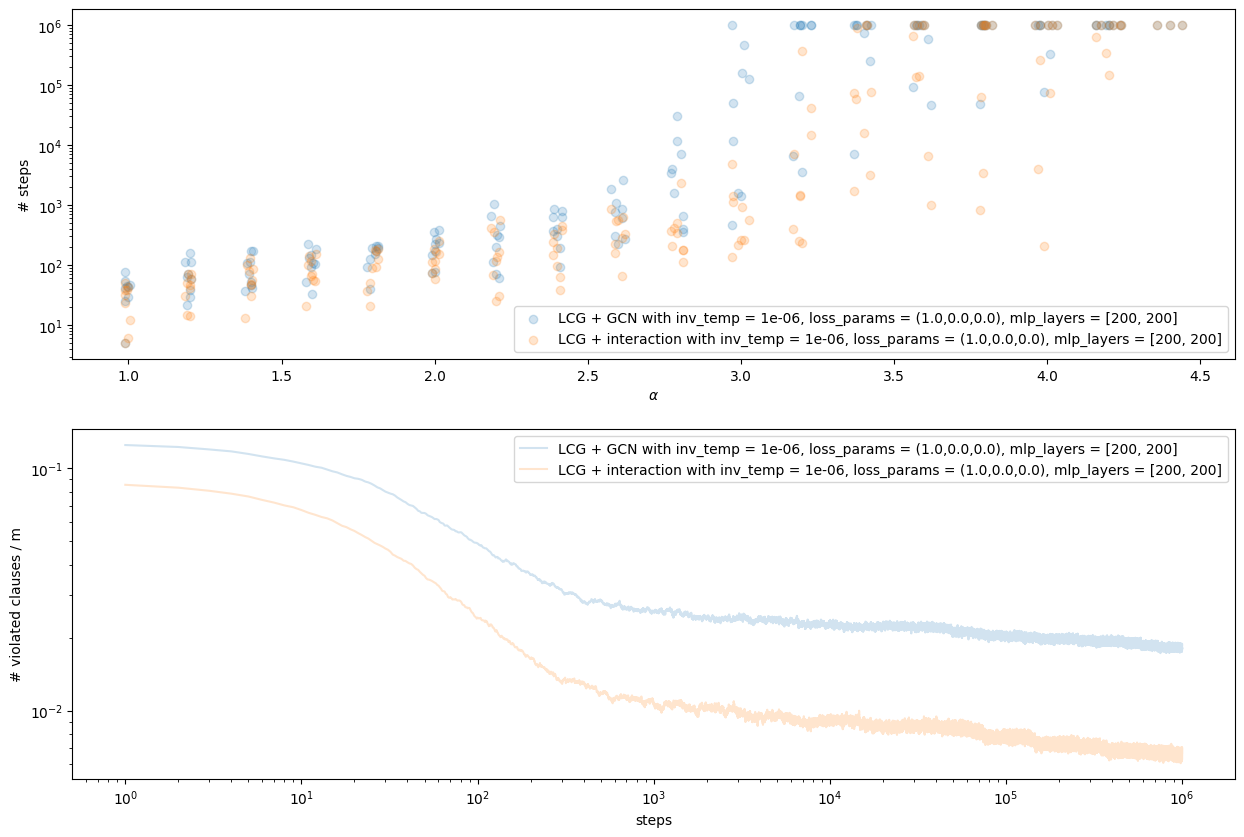

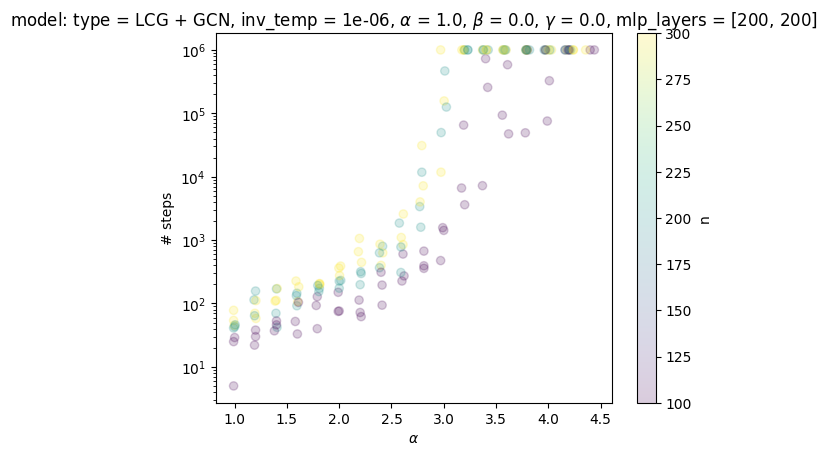

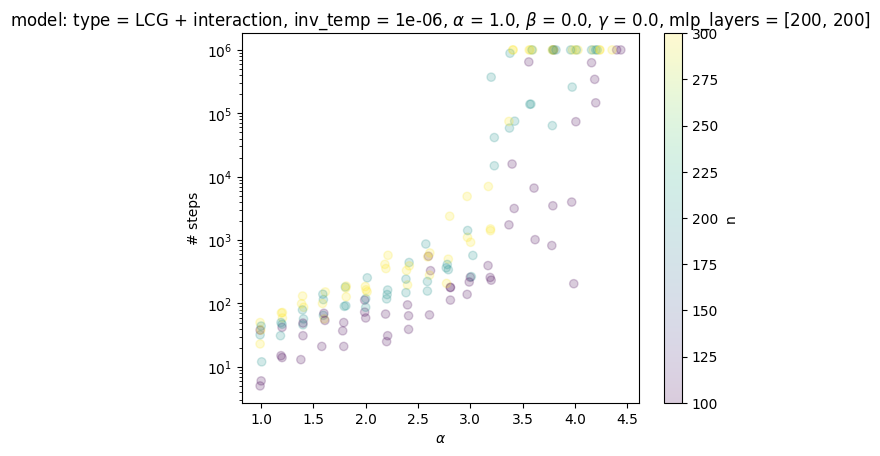

1 0


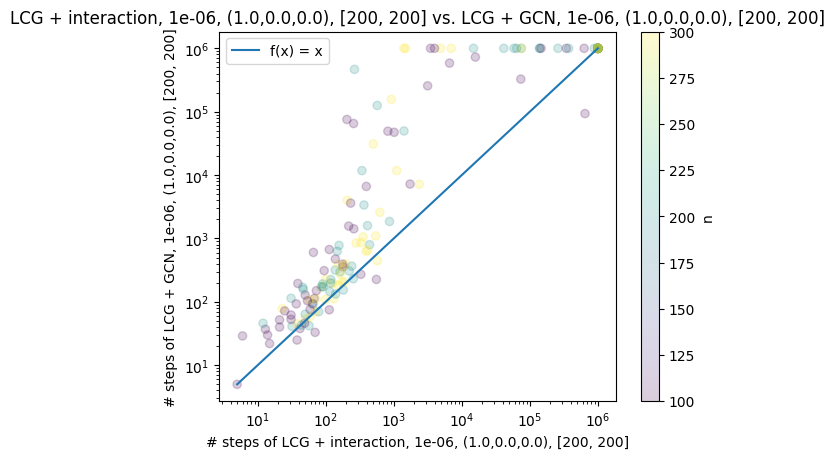

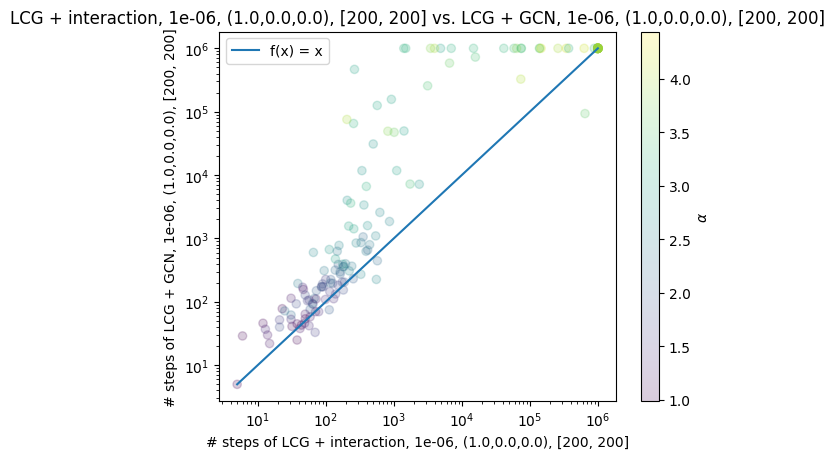

In [45]:
#saved_eval_path_list = ["/Users/p403830/Downloads/samples_random_3SAT/uniform_total_eval_EVALUATION_SET.npy",
#                        "/Users/p403830/Downloads/samples_random_3SAT/schoening_total_eval_EVALUATION.npy",
saved_eval_path_list=  ["/Users/p403830/Downloads/samples_random_3SAT/samples_random_3SAT_evaluationbenchmark_LCG_VCG_3SAT20230530-155713.npy",
                        "/Users/p403830/Downloads/samples_random_3SAT/samples_random_3SAT_evaluationbenchmark_LCG_VCG_3SAT20230530-122213.npy"
                        ]
do_evaluation_multiple_models(saved_eval_path_list)

for saved_eval_path in saved_eval_path_list:
    do_evaluation_for_single_model(saved_eval_path)

for i in range(len(saved_eval_path_list)):
    for j in range(i):
        print(i,j)
        benchmark_two_models(saved_eval_path_list[i], saved_eval_path_list[j], color_coded = "n")
        benchmark_two_models(saved_eval_path_list[i], saved_eval_path_list[j], color_coded = "alpha")   

In [1]:
import numpy as np
x = np.load("/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_n300_subset/random_3SAT20230530-134743_total_eval.npy", allow_pickle=True)

ModuleNotFoundError: No module named 'python'

IndexError: list index out of range

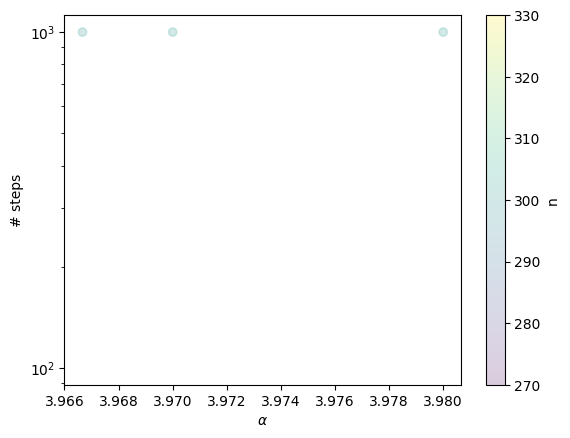

In [16]:
plot_number_of_steps_single_model(total_steps, n_array, alpha_array, model_details)

In [10]:
import plotly.express as px
# df = px.data.tips()
df = {"alpha": alpha_array, "num_steps": total_steps, "n": n_array}
fig = px.scatter(df, x="alpha", y="num_steps", color="n",
                 title="numsteps of moser as a function of alpha")

fig.show()

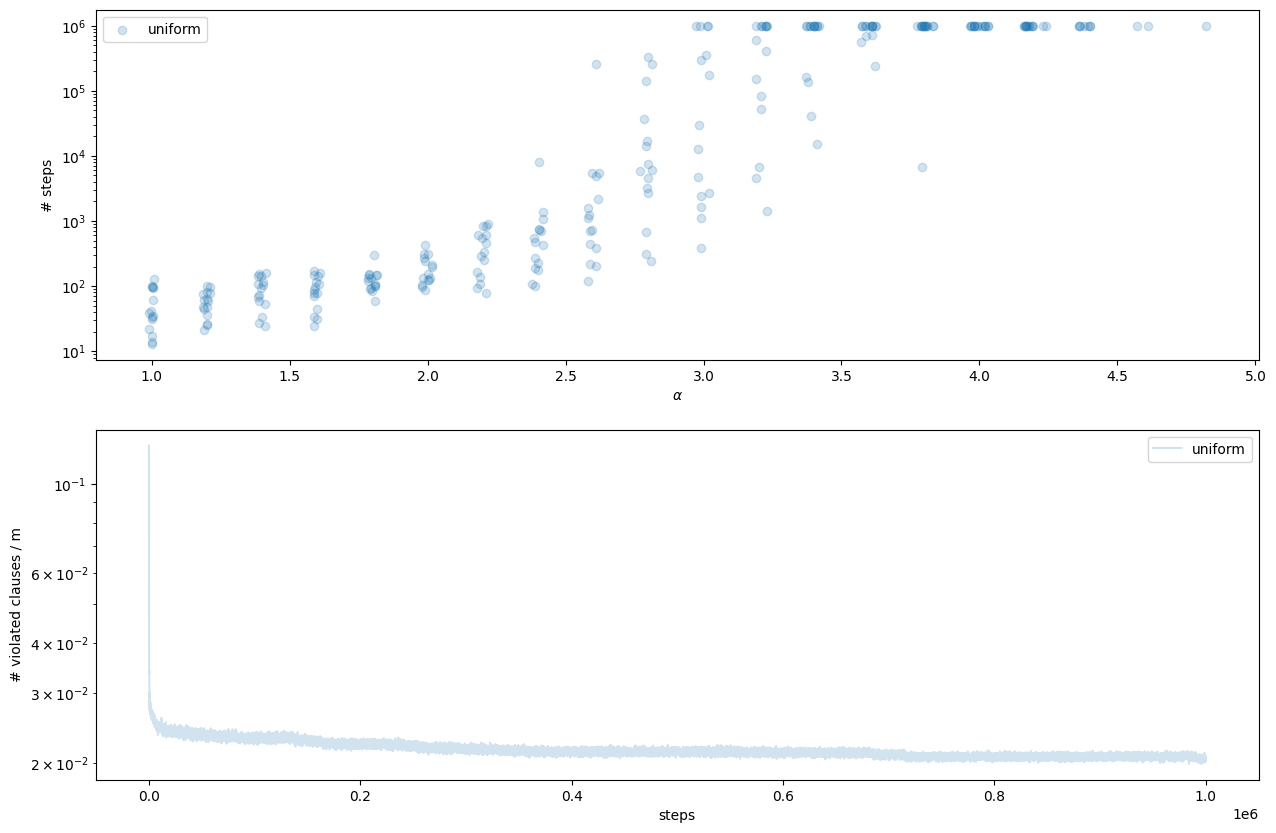

In [26]:
saved_eval_path_list = ["/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/uniform_total_eval.npy"]
do_evaluation_multiple_models(saved_eval_path_list)

for saved_eval_path in saved_eval_path_list:
    do_evaluation_for_single_model(saved_eval_path)